In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer


In [77]:
data=pd.read_csv(r"C:\Users\SREEVIBU\OneDrive\Desktop\STARBUGS\starbucks.csv")


In [78]:
df=pd.DataFrame(data)
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [79]:
df.shape

(242, 18)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [81]:
df['Vitamin A (% DV) ']=df['Vitamin A (% DV) '].str.replace('%', '').astype(float)
df['Vitamin C (% DV)']=df['Vitamin C (% DV)'].str.replace('%', '').astype(float)
df[' Calcium (% DV) ']=df[' Calcium (% DV) '].str.replace('%', '').astype(float)
df['Iron (% DV) ']=df['Iron (% DV) '].str.replace('%', '').astype(float)

In [82]:
df['Caffeine (mg)'] = pd.to_numeric(df['Caffeine (mg)'], errors='coerce')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    float64

In [84]:
df.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [85]:
df.describe()

,Calories,Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,219.000000
mean,193.871901,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512,9.830579,3.648760,20.756198,7.446281,89.520548
std,102.863303,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659,8.097962,14.421794,14.542343,10.486467,64.726831
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000,4.000000,0.000000,10.000000,0.000000,50.000000
50%,185.000000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000,8.000000,0.000000,20.000000,2.000000,75.000000
75%,260.000000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000,15.000000,0.000000,30.000000,10.000000,142.500000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000,50.000000,100.000000,60.000000,50.000000,410.000000



Top Beverage Categories:
Beverage_category
Classic Espresso Drinks              58
Tazo® Tea Drinks                     52
Signature Espresso Drinks            40
Frappuccino® Blended Coffee          36
Shaken Iced Beverages                18
Frappuccino® Blended Crème           13
Frappuccino® Light Blended Coffee    12
Smoothies                             9
Coffee                                4
Name: count, dtype: int64


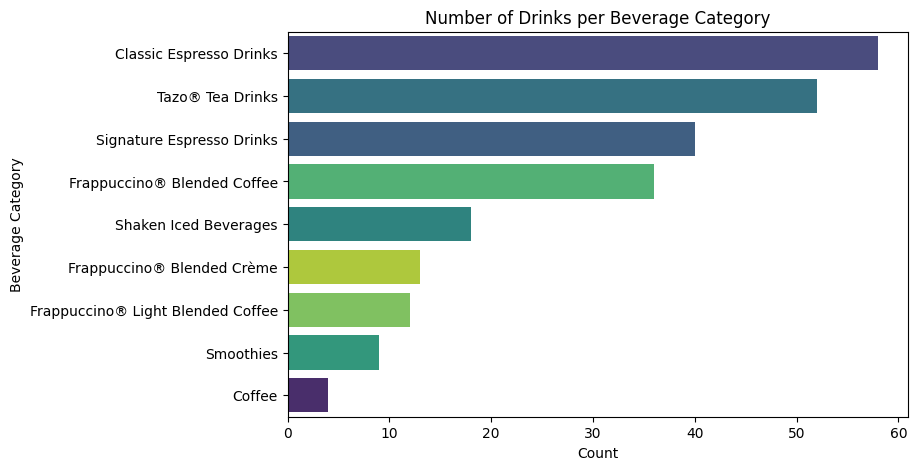

In [86]:
print("\nTop Beverage Categories:")
print(df['Beverage_category'].value_counts())

plt.figure(figsize=(8,5))
sns.countplot(y='Beverage_category', data=df, order=df['Beverage_category'].value_counts().index, palette='viridis', hue='Beverage_category', legend=False)
plt.title("Number of Drinks per Beverage Category")
plt.xlabel("Count")
plt.ylabel("Beverage Category")
plt.show()

In [87]:
df['Beverage'].value_counts()

Beverage
Caffè Latte                                            12
Tazo® Full-Leaf Tea Latte                              12
Caffè Mocha (Without Whipped Cream)                    12
Vanilla Latte (Or Other Flavoured Latte)               12
Cappuccino                                             12
Caramel Macchiato                                      12
Tazo® Green Tea Latte                                  12
Hot Chocolate (Without Whipped Cream)                  12
White Chocolate Mocha (Without Whipped Cream)          12
Tazo® Chai Tea Latte                                   12
Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)        12
Coffee                                                 12
Java Chip (Without Whipped Cream)                       9
Mocha (Without Whipped Cream)                           9
Caramel (Without Whipped Cream)                         9
Iced Brewed Coffee (With Milk & Classic Syrup)          9
Strawberries & Crème (Without Whipped Cream)            9
Brewe

In [88]:
df['Beverage_prep'].value_counts()

Beverage_prep
Soymilk               66
2% Milk               50
Grande Nonfat Milk    26
Tall Nonfat Milk      23
Venti Nonfat Milk     22
Whole Milk            16
Short Nonfat Milk     12
Tall                   7
Grande                 7
Venti                  7
Short                  4
Solo                   1
Doppio                 1
Name: count, dtype: int64

In [89]:
df.isnull().sum()

Beverage_category             0
Beverage                      0
Beverage_prep                 0
Calories                      0
 Total Fat (g)                0
Trans Fat (g)                 0
Saturated Fat (g)             0
 Sodium (mg)                  0
 Total Carbohydrates (g)      0
Cholesterol (mg)              0
 Dietary Fibre (g)            0
 Sugars (g)                   0
 Protein (g)                  0
Vitamin A (% DV)              0
Vitamin C (% DV)              0
 Calcium (% DV)               0
Iron (% DV)                   0
Caffeine (mg)                23
dtype: int64

In [90]:
df['Caffeine (mg)'].mode()

0    75.0
Name: Caffeine (mg), dtype: float64

In [91]:
df['Caffeine (mg)']=df['Caffeine (mg)'].fillna(df['Caffeine (mg)'].mode()[0]) 

In [92]:
df['Caffeine (mg)'] = pd.to_numeric(df['Caffeine (mg)'], errors='coerce')

In [93]:
df.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                0
dtype: int64

skew value:0.3783959019143193


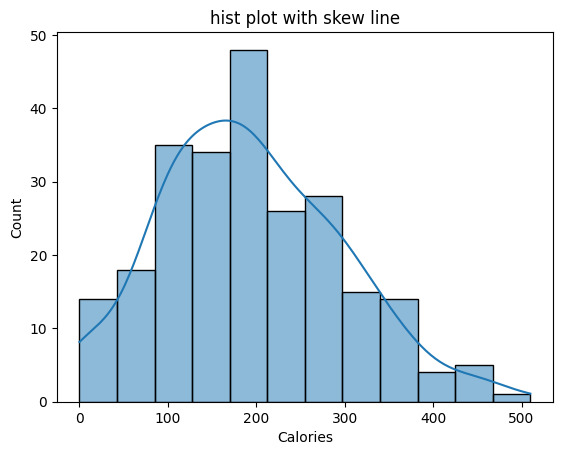

In [94]:
skew=df['Calories'].skew()
print(f"skew value:{skew}")
sns.histplot(x='Calories',data=df,kde=True)
plt.title("hist plot with skew line")
plt.show()

skew value:1.1491711492720555


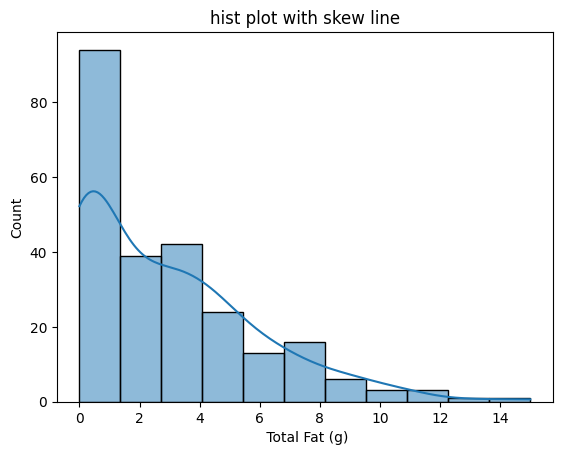

In [95]:
df[' Total Fat (g)'] = pd.to_numeric(df[' Total Fat (g)'], errors='coerce')
df[' Total Fat (g)'] = df[' Total Fat (g)'].fillna(df[' Total Fat (g)'].mean())
skew=df[' Total Fat (g)'].skew()
print(f"skew value:{skew}")
sns.histplot(x=' Total Fat (g)',data=df,kde=True)
plt.title("hist plot with skew line")
plt.show()

0.00625952878138689


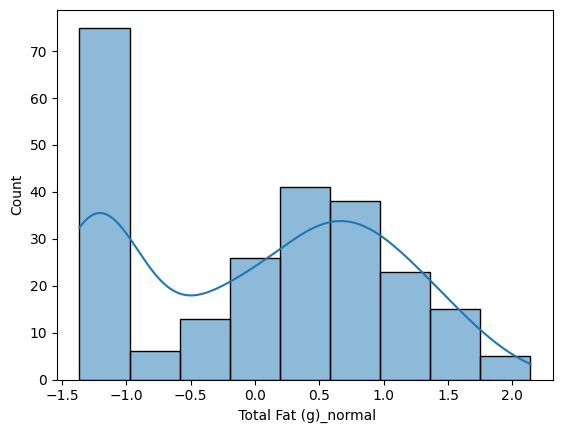

In [96]:
pt = PowerTransformer(method='yeo-johnson')
df[' Total Fat (g)_normal'] = pt.fit_transform(df[[' Total Fat (g)']])
sns.histplot(x=' Total Fat (g)_normal',data=df,kde=True)
skew=df[' Total Fat (g)_normal'].skew()
print(skew)

skew value:1.6948250973446362


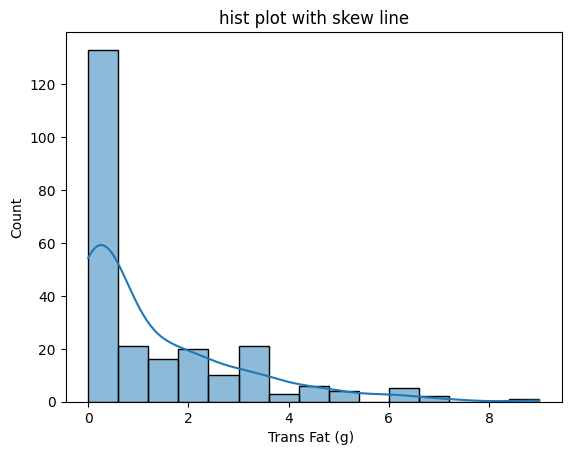

In [97]:
skew=df['Trans Fat (g) '].skew()
print(f"skew value:{skew}")
sns.histplot(x='Trans Fat (g) ',data=df,kde=True)
plt.title("hist plot with skew line")
plt.show()

0.24223598181577113


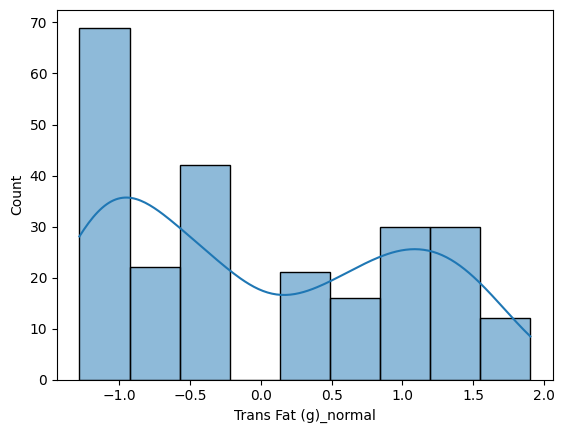

In [98]:
pt = PowerTransformer(method='yeo-johnson')
df['Trans Fat (g)_normal'] = pt.fit_transform(df[['Trans Fat (g) ']])
sns.histplot(x='Trans Fat (g)_normal',data=df,kde=True)
skew=df['Trans Fat (g)_normal'].skew()
print(skew)

skew value:1.6806599443857915


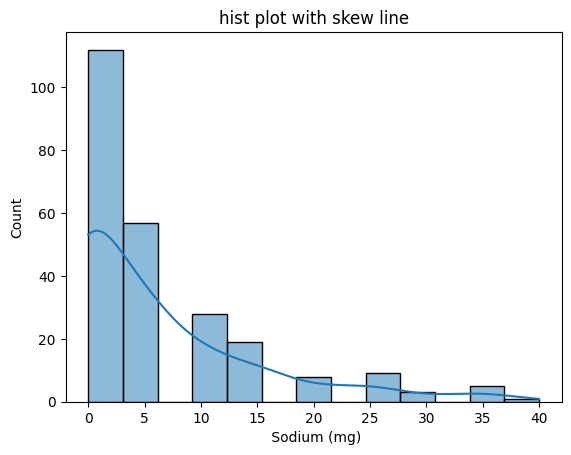

In [99]:
skew=df[' Sodium (mg)'].skew()
print(f"skew value:{skew}")
sns.histplot(x=' Sodium (mg)',data=df,kde=True)
plt.title("hist plot with skew line")
plt.show()

0.10656297938054665


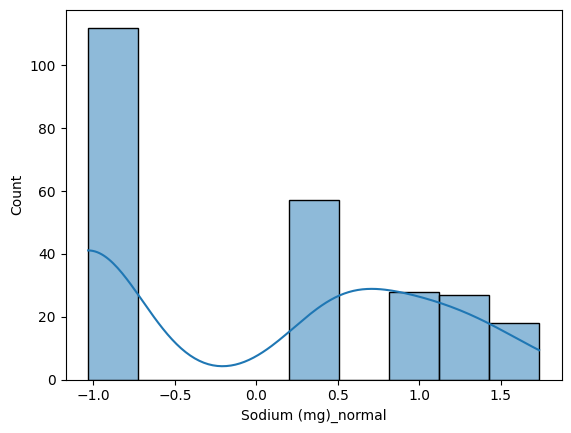

In [100]:
pt = PowerTransformer(method='yeo-johnson')
df['Sodium (mg)_normal'] = pt.fit_transform(df[[' Sodium (mg)']])
sns.histplot(x='Sodium (mg)_normal',data=df,kde=True)
skew=df['Sodium (mg)_normal'].skew()
print(skew)

skew value:0.4778429276381171


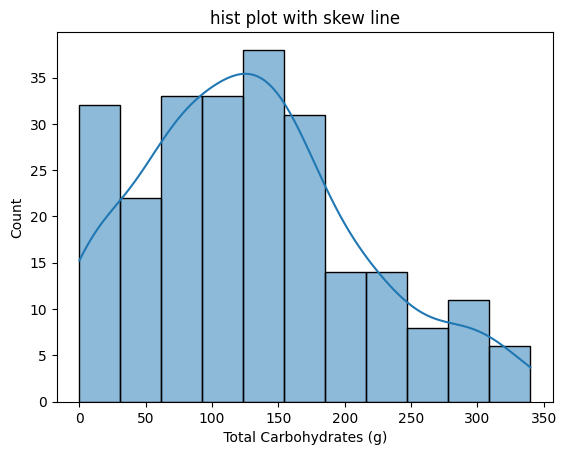

In [101]:
skew=df[' Total Carbohydrates (g) '].skew()
print(f"skew value:{skew}")
sns.histplot(x=' Total Carbohydrates (g) ',data=df,kde=True)
plt.title("hist plot with skew line")
plt.show()

skew value:0.389012986165789


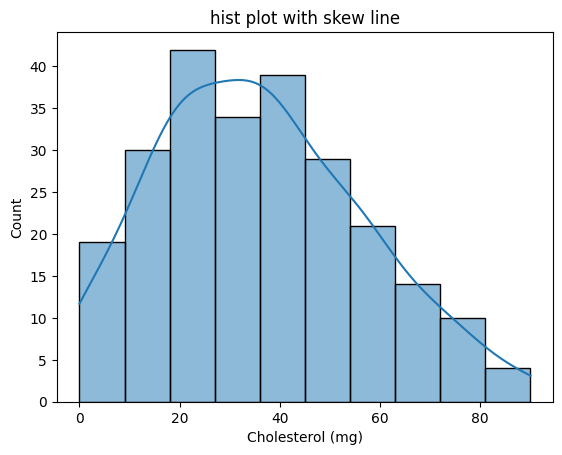

In [102]:
skew=df['Cholesterol (mg)'].skew()
print(f"skew value:{skew}")
sns.histplot(x='Cholesterol (mg)',data=df,kde=True)
plt.title("hist plot with skew line")
plt.show()

skew value:2.8930215351899338


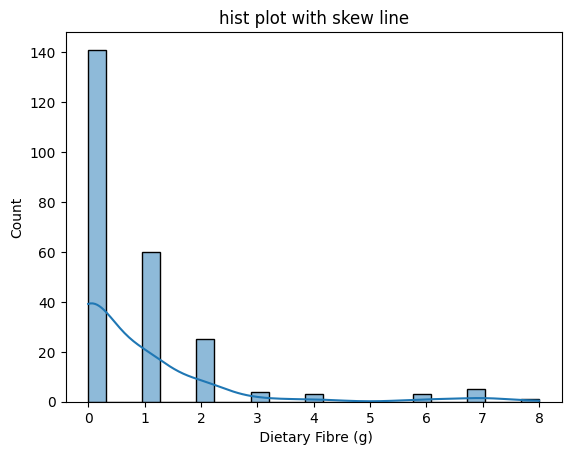

In [103]:
skew=df[' Dietary Fibre (g)'].skew()
print(f"skew value:{skew}")
sns.histplot(x=' Dietary Fibre (g)',data=df,kde=True)
plt.title("hist plot with skew line")
plt.show()

0.4702057976401612


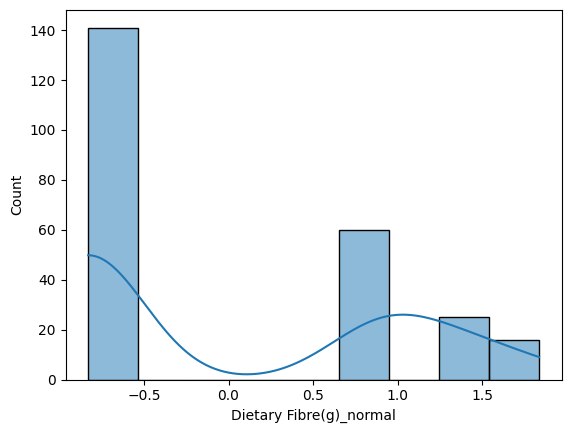

In [104]:
pt = PowerTransformer(method='yeo-johnson')
df['Dietary Fibre(g)_normal'] = pt.fit_transform(df[[' Dietary Fibre (g)']])
sns.histplot(x='Dietary Fibre(g)_normal',data=df,kde=True)
skew=df['Dietary Fibre(g)_normal'].skew()
print(skew)

skew value:0.46815547830881427


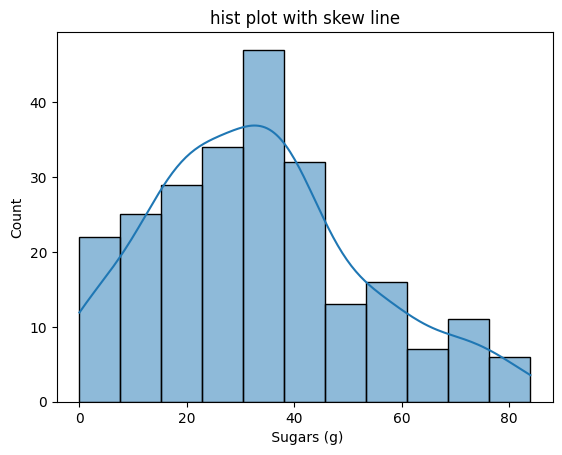

In [105]:
skew=df[' Sugars (g)'].skew()
print(f"skew value:{skew}")
sns.histplot(x=' Sugars (g)',data=df,kde=True)
plt.title("hist plot with skew line")
plt.show()

skew value:0.7074660375273982


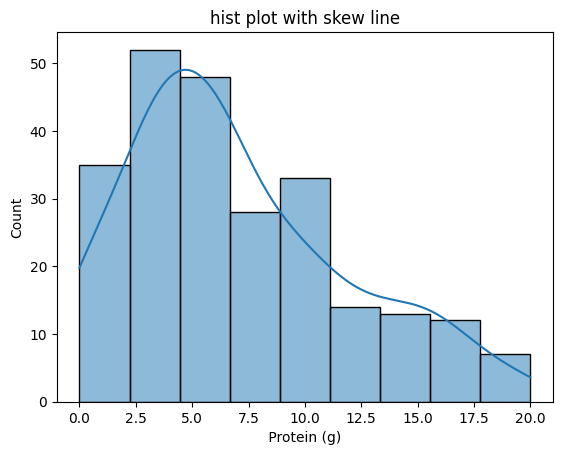

In [106]:
skew=df[' Protein (g) '].skew()
print(f"skew value:{skew}")
sns.histplot(x=' Protein (g) ',data=df,kde=True)
plt.title("hist plot with skew line")
plt.show()

-0.0622826098982717


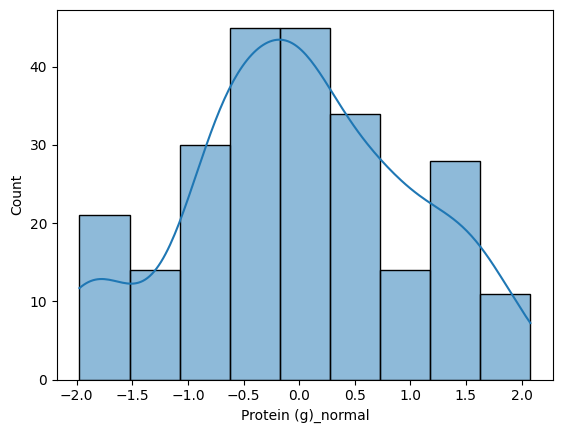

In [107]:
pt = PowerTransformer(method='yeo-johnson')
df['Protein (g)_normal'] = pt.fit_transform(df[[' Protein (g) ']])
sns.histplot(x='Protein (g)_normal',data=df,kde=True)
skew=df['Protein (g)_normal'].skew()
print(skew)

skew value:1.85588852790637


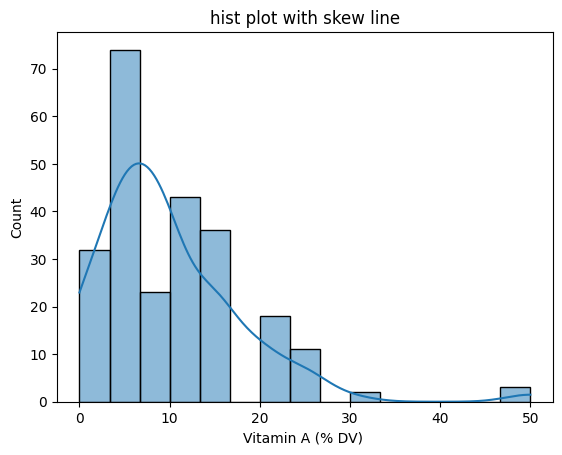

In [108]:
skew=df['Vitamin A (% DV) '].skew()
print(f"skew value:{skew}")
sns.histplot(x='Vitamin A (% DV) ',data=df,kde=True)
plt.title("hist plot with skew line")
plt.show()

-0.005432885003815622


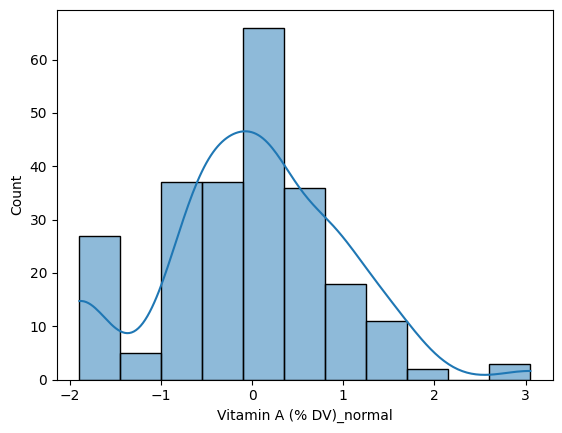

In [109]:
pt = PowerTransformer(method='yeo-johnson')
df['Vitamin A (% DV)_normal'] = pt.fit_transform(df[['Vitamin A (% DV) ']])
sns.histplot(x='Vitamin A (% DV)_normal',data=df,kde=True)
skew=df['Vitamin A (% DV)_normal'].skew()
print(skew)

skew value:0.662589859682682


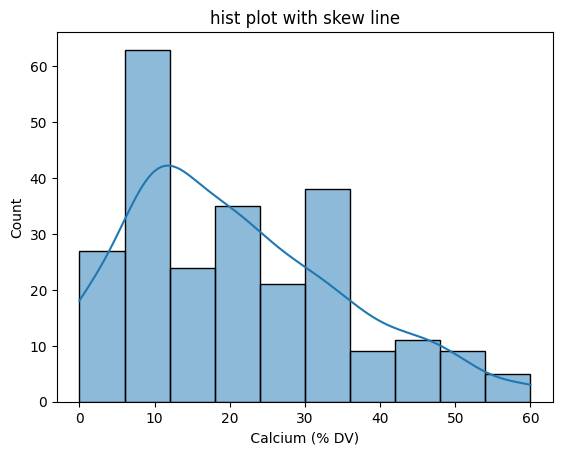

In [110]:
skew=df[' Calcium (% DV) '].skew()
print(f"skew value:{skew}")
sns.histplot(x=' Calcium (% DV) ',data=df,kde=True)
plt.title("hist plot with skew line")
plt.show()

-0.13239067379681205


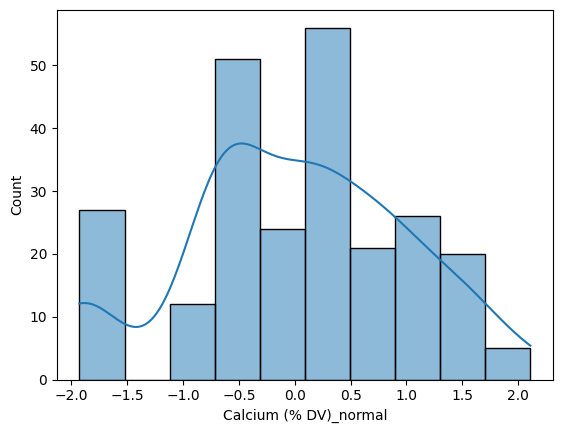

In [111]:
pt = PowerTransformer(method='yeo-johnson')
df['Calcium (% DV)_normal'] = pt.fit_transform(df[[' Calcium (% DV) ']])
sns.histplot(x='Calcium (% DV)_normal',data=df,kde=True)
skew=df['Calcium (% DV)_normal'].skew()
print(skew)

skew value:1.67303406368902


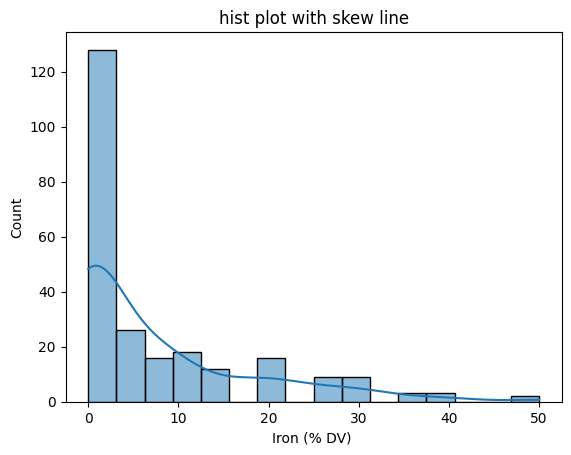

In [112]:
skew=df['Iron (% DV) '].skew()
print(f"skew value:{skew}")
sns.histplot(x='Iron (% DV) ',data=df,kde=True)
plt.title("hist plot with skew line")
plt.show()

0.14988781900326356


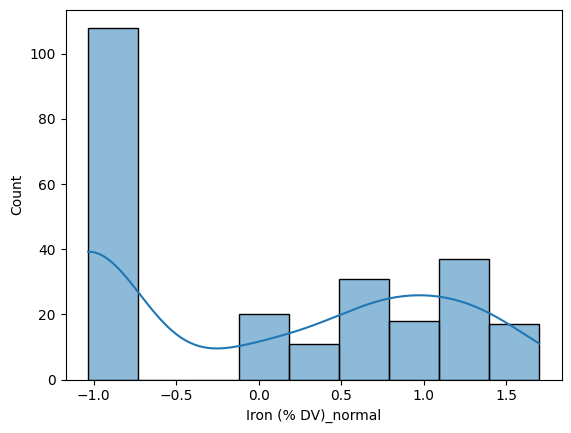

In [113]:
pt = PowerTransformer(method='yeo-johnson')
df['Iron (% DV)_normal'] = pt.fit_transform(df[['Iron (% DV) ']])
sns.histplot(x='Iron (% DV)_normal',data=df,kde=True)
skew=df['Iron (% DV)_normal'].skew()
print(skew)

skew value:0.9821518252030865


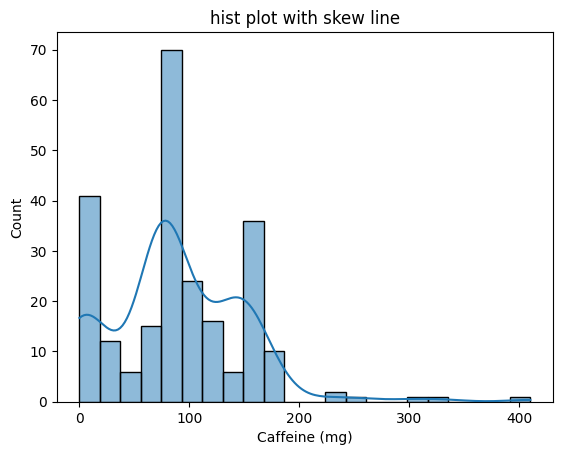

In [114]:
skew=df['Caffeine (mg)'].skew()
print(f"skew value:{skew}")
sns.histplot(x='Caffeine (mg)',data=df,kde=True)
plt.title("hist plot with skew line")
plt.show()

-0.3571418103703413


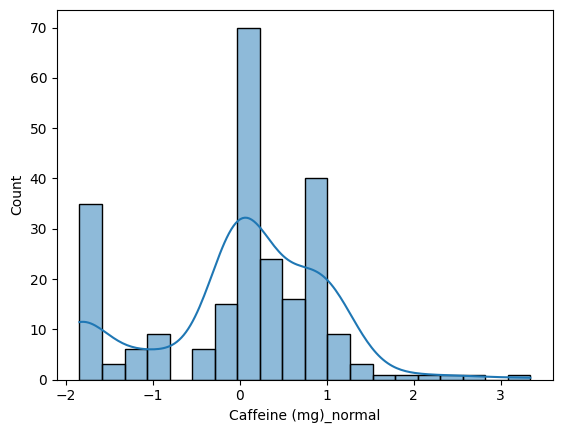

In [115]:
pt = PowerTransformer(method='yeo-johnson')
df['Caffeine (mg)_normal'] = pt.fit_transform(df[['Caffeine (mg)']])
sns.histplot(x='Caffeine (mg)_normal',data=df,kde=True)
skew=df['Caffeine (mg)_normal'].skew()
print(skew)

In [116]:
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),...,Caffeine (mg),Total Fat (g)_normal,Trans Fat (g)_normal,Sodium (mg)_normal,Dietary Fibre(g)_normal,Protein (g)_normal,Vitamin A (% DV)_normal,Calcium (% DV)_normal,Iron (% DV)_normal,Caffeine (mg)_normal
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,...,175.0,-1.241889,-1.282972,-1.031484,-0.828883,-1.797897,-1.894107,-1.925728,-1.033876,1.248739
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,...,260.0,-1.241889,-1.282972,-1.031484,-0.828883,-1.692152,-1.894107,-1.925728,-1.033876,2.093485
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,...,330.0,-1.241889,-1.282972,-1.031484,-0.828883,-1.458559,-1.894107,-1.925728,-1.033876,2.705644
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,...,410.0,-1.241889,-1.282972,-1.031484,-0.828883,-1.458559,-1.894107,-1.530034,-1.033876,3.342733
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,...,75.0,-1.241889,-1.002763,0.498310,-0.828883,-0.019494,0.255436,0.122375,-1.033876,-0.014886


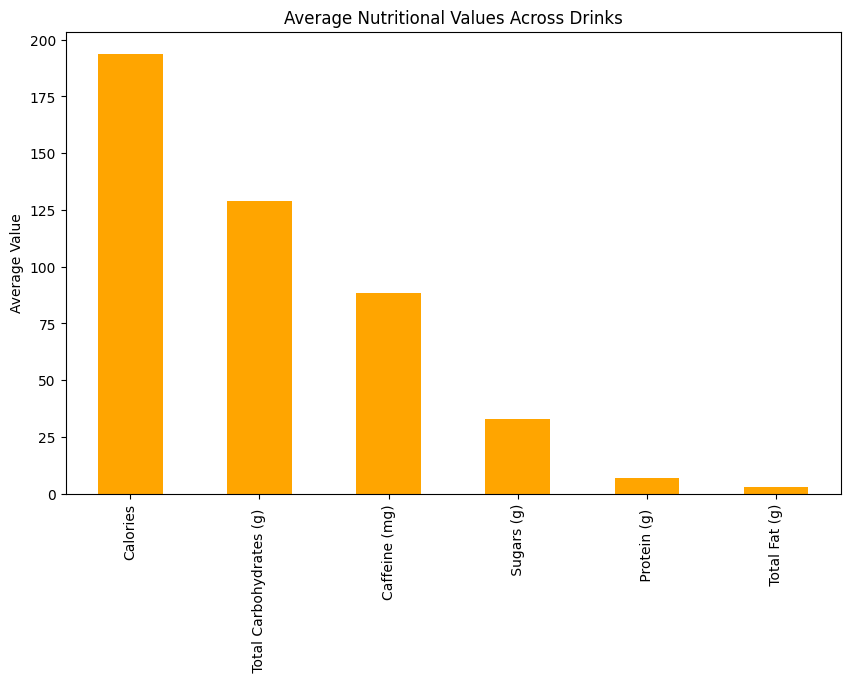

In [117]:
numeric_cols = ['Calories', ' Total Fat (g)', ' Sugars (g)', ' Protein (g) ', ' Total Carbohydrates (g) ', 'Caffeine (mg)']

for col in [' Total Fat (g)', ' Total Carbohydrates (g) ', 'Caffeine (mg)']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

numeric_cols = [col for col in numeric_cols if col in df.columns]  

plt.figure(figsize=(10,6))
df[numeric_cols].mean().sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title("Average Nutritional Values Across Drinks")
plt.ylabel("Average Value")
plt.show()

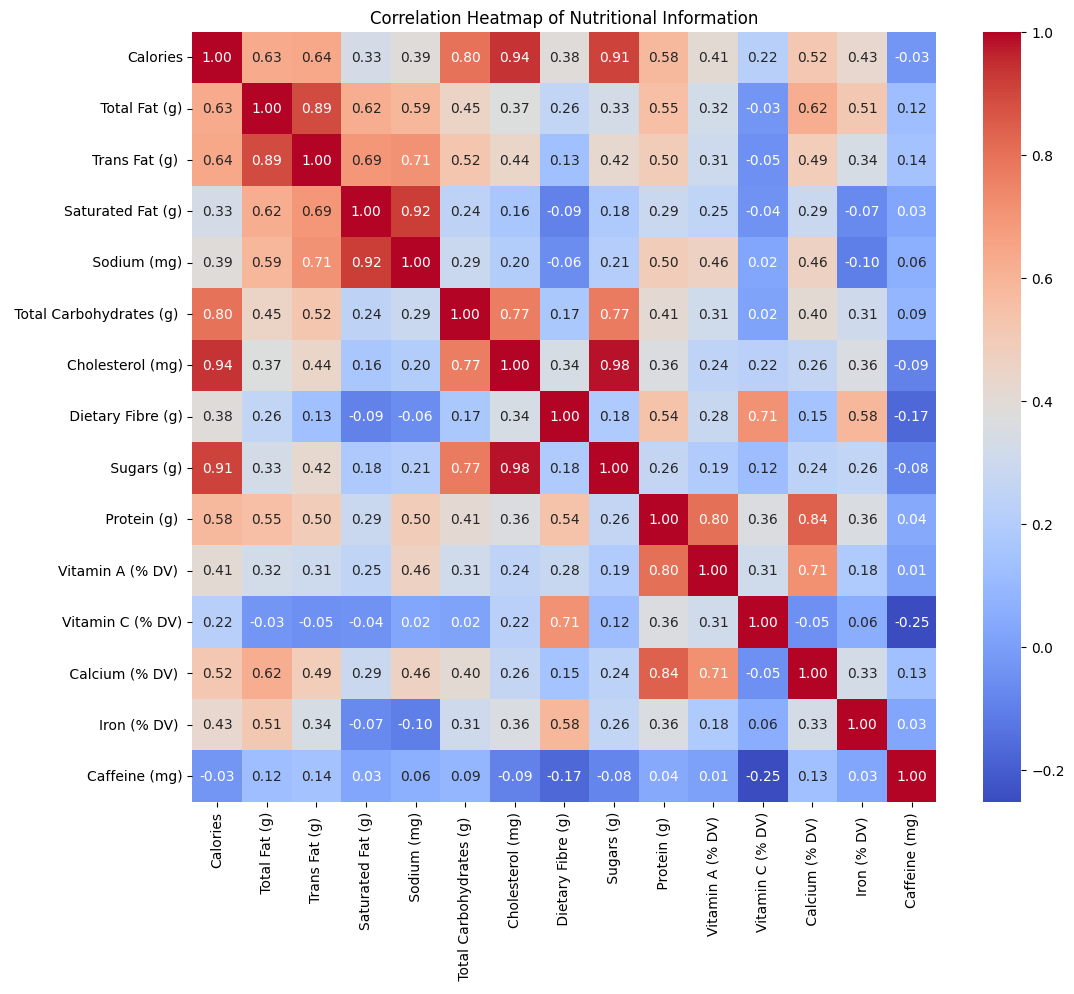

In [118]:
numeric_cols = ['Calories', ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)',]

plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_cols].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Nutritional Information")
plt.show()

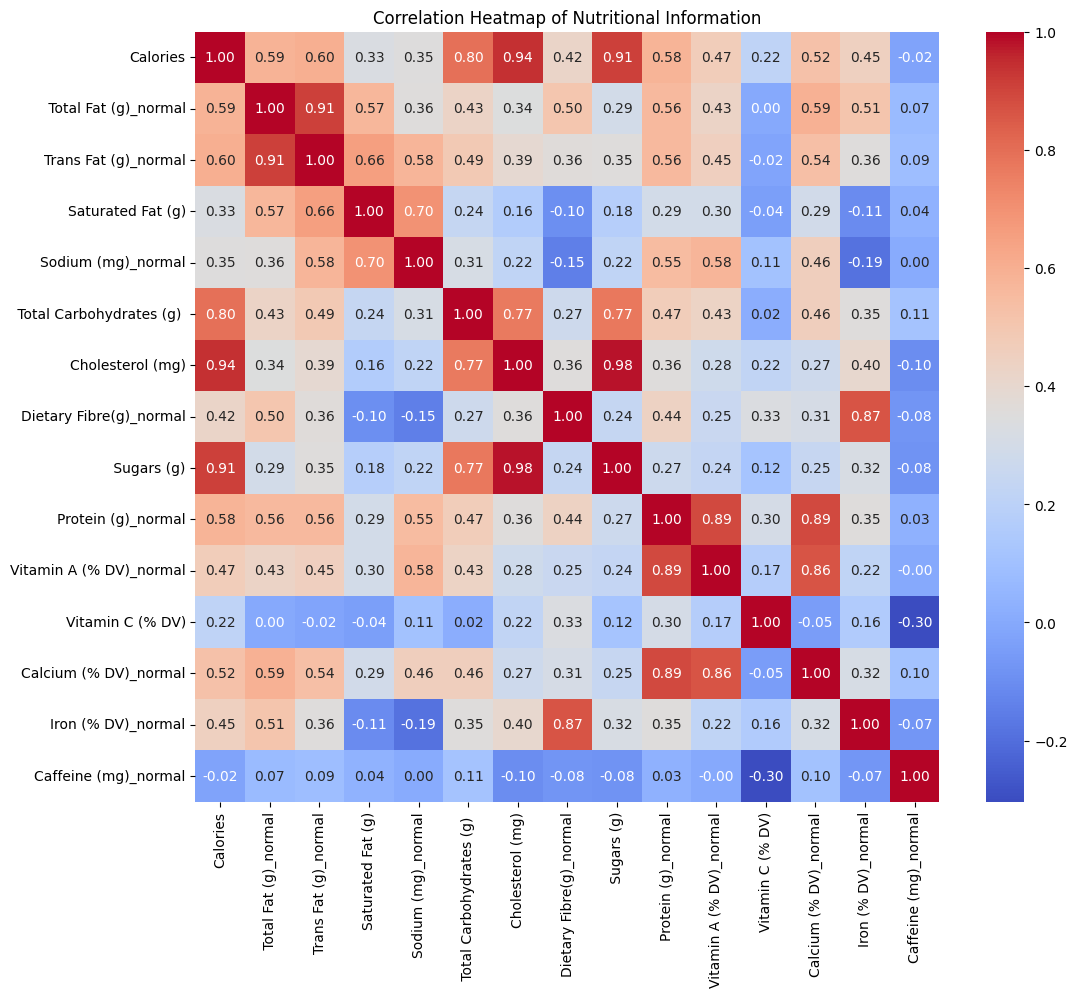

In [119]:
numeric_cols = ['Calories',' Total Fat (g)_normal', 'Trans Fat (g)_normal', 'Saturated Fat (g)', 'Sodium (mg)_normal',
                ' Total Carbohydrates (g) ', 'Cholesterol (mg)','Dietary Fibre(g)_normal', ' Sugars (g)', 'Protein (g)_normal', 'Vitamin A (% DV)_normal',
                'Vitamin C (% DV)','Calcium (% DV)_normal', 'Iron (% DV)_normal', 'Caffeine (mg)_normal']

plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_cols].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Nutritional Information")
plt.show()


Top 10 Highest Calorie Drinks:


,Beverage,Calories
84,White Chocolate Mocha (Without Whipped Cream),510
85,White Chocolate Mocha (Without Whipped Cream),460
215,Java Chip (Without Whipped Cream),460
83,White Chocolate Mocha (Without Whipped Cream),450
128,Tazo® Green Tea Latte,450
216,Java Chip (Without Whipped Cream),430
214,Java Chip (Without Whipped Cream),420
81,White Chocolate Mocha (Without Whipped Cream),400
129,Tazo® Green Tea Latte,390
197,Mocha (Without Whipped Cream),390


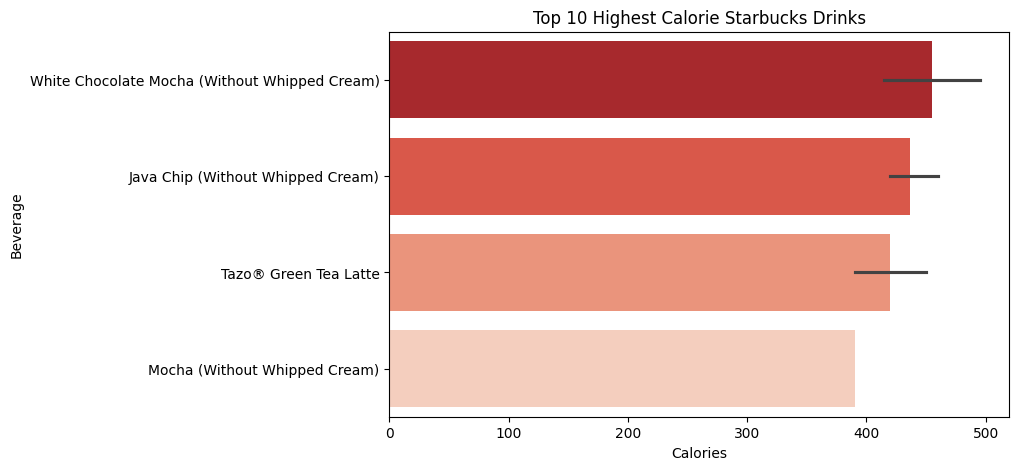

In [120]:
print("\nTop 10 Highest Calorie Drinks:")
top_calories = df[['Beverage', 'Calories']].sort_values(by='Calories', ascending=False).head(10)
display(top_calories)

plt.figure(figsize=(8,5))
sns.barplot(x='Calories', y='Beverage', data=top_calories, palette='Reds_r', hue='Beverage', legend=False)
plt.title("Top 10 Highest Calorie Starbucks Drinks")
plt.show()

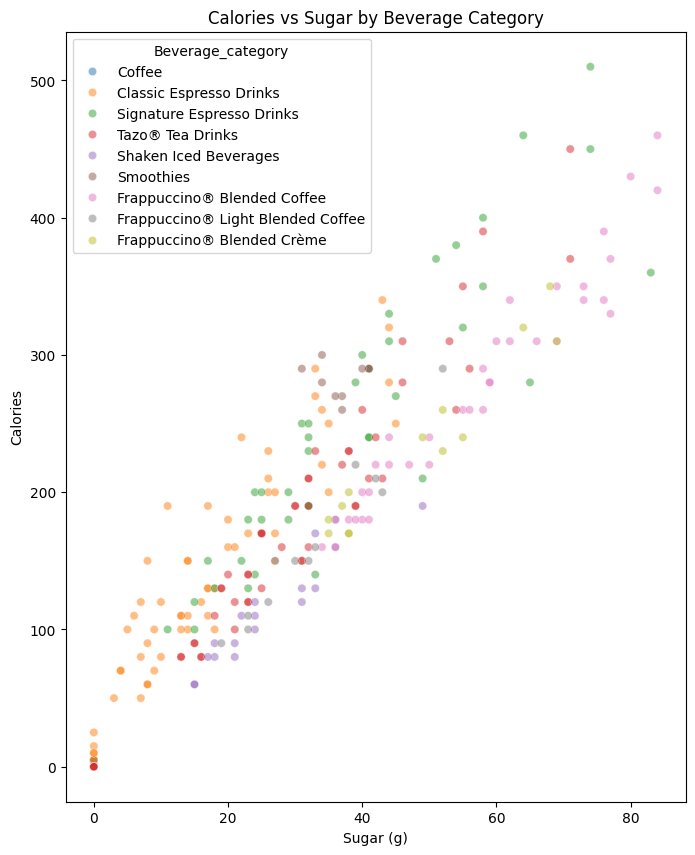

In [121]:
plt.figure(figsize=(8,10))
sns.scatterplot(x=' Sugars (g)', y='Calories', data=df, hue='Beverage_category', alpha=0.5)
plt.title("Calories vs Sugar by Beverage Category")
plt.xlabel("Sugar (g)")
plt.ylabel("Calories")
plt.show()